In [223]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [13]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
missing_age = data['Age'].isnull().sum()
print(missing_age)

0


In [21]:
missing_embarked = data['Embarked'].isnull().sum()
print(missing_embarked)

0


In [17]:
# DATA PREPROCESSING
data['Age'].fillna(data['Age'].median(), inplace = True)

In [16]:
data['Embarked'].fillna(data['Age'].mode()[0], inplace = True)

In [19]:
missing_age = data['Age'].isnull().sum()
print(missing_age)

0


In [22]:
missing_fare = data['Fare'].isnull().sum
print(missing_fare)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool>


In [24]:
data.dropna(subset = ['Fare'], inplace = True)

In [25]:
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'], drop_first= True)

In [27]:
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [28]:
x = data.drop(columns=['Survived'])
y = data['Survived'] 

In [182]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [183]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
#BUILD THE NEURAL NETWORK
model = Sequential()

In [185]:
#input layer and first hidden layer
model.add(Dense(units=16, activation='tanh', input_shape = (X_train_scaled.shape[1],)))

/home/kuki/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [198]:
#second hidden layer
model.add(Dense(units=16, activation = 'tanh'))

In [201]:
# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

In [212]:
model.add(BatchNormalization())


In [213]:
#output layer binary classification
model.add(Dense(units=1, activation = 'sigmoid'))

In [224]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [230]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [225]:
#training the model
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_test_scaled, y_test)), 

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8328 - loss: 0.4061 - val_accuracy: 0.7164 - val_loss: 0.7868
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8360 - loss: 0.4021 - val_accuracy: 0.7164 - val_loss: 0.7924
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8460 - loss: 0.4045 - val_accuracy: 0.7164 - val_loss: 0.7931
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8173 - loss: 0.4344 - val_accuracy: 0.7164 - val_loss: 0.7991
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8235 - loss: 0.4162 - val_accuracy: 0.7164 - val_loss: 0.7978
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8566 - loss: 0.3821 - val_accuracy: 0.7164 - val_loss: 0.8015
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8488 - loss: 0.3868 - val_accuracy: 0.7164 - val_loss: 0.7959
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8359 - loss: 0.4118 - val_accuracy: 0.7164 - val_loss

In [226]:
train_accuracy = model.evaluate(X_train_scaled, y_train, verbose = 0)[1]
test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 0)[1]
print(f"Training accuracy {train_accuracy}")
print(f"Testing accuracy {test_accuracy}")

Training accuracy 0.7576243877410889
Testing accuracy 0.7126865386962891


In [227]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [228]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[116  38]
 [ 39  75]]


In [229]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       154
           1       0.66      0.66      0.66       114

    accuracy                           0.71       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.71      0.71      0.71       268



In [194]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)

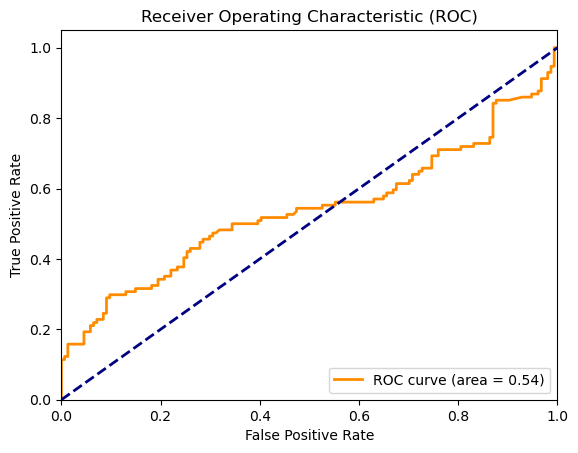

Area Under Curve (AUC): 0.538505354294828


In [115]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"Area Under Curve (AUC): {roc_auc}")